In [1]:
# Basic layout of the code
# The purpose of this code is to find out corelation between price of a consumable (BigMac) and GDP's from 2000-2016
# We will apply Linear Regression and RandomForest Regression to the following:
# 1. The entire dataset
# 2. Three arbitrarily chose countries (Argentina, Canada and USA)
# 3. Three geographical regions (Americas, Asia and Europe)
# 4. Countires with Top5 GDP
# 5. Countires with Bottom5 GDP
# Linear Regression analysis will be done using log10(GDP) as feature and dollar_price as the target
# Linear Regression analysis will be also be done using GPD_per_Capita as feature and dollar_price as target
# RandomForest Regression will use multiple features while keeping dollar_price as the target
# Accuracy of the Linear Regression analysis will be determined by R-square
# Accuracy of the RandomForest Regression will be determined by either RMSE or relative mean error

In [2]:
# Import depedencies
import numpy as np
import pandas as pd
from pathlib import Path
# from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


# Read the CSV and Perform Basic Data Cleaning

In [3]:
#Load data
file_path = Path('../Final_Project_Resources/final.csv')
df = pd.read_csv (file_path)
df.head(2)



,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region,GDP_log10
0,4/1/2000,ARS,Argentina,2.50,1,2.50,2000,ARG,-10.894485,6854.294081,2.582820e+11,32,Americas,Latin America and the Caribbean,NaN
1,4/1/2000,AUD,Australia,2.59,1,2.59,2000,AUS,4.001431,45806.687450,9.001660e+11,36,Oceania,Australia and New Zealand,NaN


In [4]:
# Convert the 'GDP' column into log10
df['GDP_log10'] = np.log10(df['GDP'])


In [5]:
df.head(2)

,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region,GDP_log10
0,4/1/2000,ARS,Argentina,2.50,1,2.50,2000,ARG,-10.894485,6854.294081,2.582820e+11,32,Americas,Latin America and the Caribbean,11.412094
1,4/1/2000,AUD,Australia,2.59,1,2.59,2000,AUS,4.001431,45806.687450,9.001660e+11,36,Oceania,Australia and New Zealand,11.954323


In [6]:
df.describe()

,local_price,dollar_ex,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP,country_code,GDP_log10
count,9.200000e+02,9.200000e+02,920.000000,920.000000,920.000000,920.000000,9.200000e+02,920.000000,920.000000
mean,1.393870e+04,5.331433e+03,3.567609,2010.279348,3.070198,26113.144578,1.342890e+12,438.443478,11.678427
std,2.225534e+05,8.499408e+04,1.517102,4.525734,3.220871,22923.009189,2.847062e+12,258.334203,0.576048
min,2.040000e+00,1.000000e+00,0.800000,2000.000000,-14.758545,970.941956,2.229865e+10,32.000000,10.348279
25%,4.675000e+00,1.000000e+00,2.497500,2007.000000,1.601224,7495.754301,2.108125e+11,188.000000,11.323895
50%,1.395000e+01,5.000000e+00,3.330000,2012.000000,2.850864,14771.257650,3.945130e+11,416.000000,11.596061
75%,8.550000e+01,3.825000e+01,4.290000,2014.000000,4.789940,46498.842670,1.041005e+12,682.000000,12.017447
max,4.000000e+06,1.600500e+06,11.250000,2016.000000,25.162533,92121.421130,1.784430e+13,858.000000,13.251500


In [7]:
# Begining new section using entire dataset
# Applying Linear Regression to entire dataset

In [8]:
# Defining feature (X) and the variable (y)
X = df.GDP_log10.values.reshape(-1,1)
y = df.dollar_price.values.reshape(-1,1)

In [9]:
# Splitting the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# Instantiate linear regression model
model = LinearRegression()


In [10]:
# training the model
model.fit(X,y)

LinearRegression()

In [11]:
# Predicting the target value
y_pred = model.predict(X)

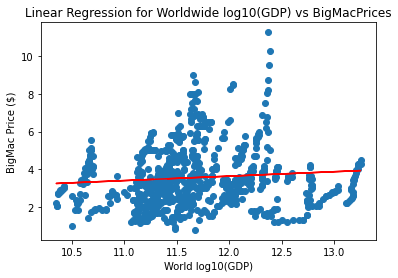

In [12]:
# Creating a scatter plot with a regression curve
plt.scatter(X, y)
plt.xlabel('World log10(GDP)')
plt.ylabel('BigMac Price ($)')
plt.title('Linear Regression for Worldwide log10(GDP) vs BigMacPrices')
plt.plot(X, y_pred, color='red')
plt.show()

In [13]:
# R-square for the model
print(model.score(X,y))

0.007917581386034933


# Applying RandomForest Regressor using multiple feature to entire dataset

In [14]:
# Dropping column "local_price", "dollar_ex" and those containing string
df_values = df.drop(['date','currency_code', 'Country', 'Code', 'country_code', 'region', 'sub_region',
                     'local_price', 'dollar_ex', 'GDP_log10'], axis=1)

In [15]:
df_values.head()

,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP
0,2.50,2000,-10.894485,6854.294081,2.582820e+11
1,2.59,2000,4.001431,45806.687450,9.001660e+11
2,2.95,2000,3.053462,8954.837245,1.607730e+12
3,2.85,2000,3.016889,44863.216020,1.406910e+12
4,2.45,2000,3.106971,9814.656135,1.539370e+11


In [16]:
# Defining the feature (X)
X = df_values.drop('dollar_price', axis=1)
X.head()

,Year,gdp_growth,GDP_Per_Capita,GDP
0,2000,-10.894485,6854.294081,2.582820e+11
1,2000,4.001431,45806.687450,9.001660e+11
2,2000,3.053462,8954.837245,1.607730e+12
3,2000,3.016889,44863.216020,1.406910e+12
4,2000,3.106971,9814.656135,1.539370e+11


In [17]:
# Defining the target (y)
y = df_values['dollar_price']

In [18]:
len(df_values)

920

In [19]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 28)

In [20]:
# # Feature Scaling
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [21]:
# Instantiate the model
model = RandomForestRegressor(n_estimators= 100, random_state= 0)

In [22]:
# Fitting the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [23]:
# Predicting the target value
y_pred =model.predict(X_test)

In [24]:
# RMSE is improved when columns "local_price" and "dollar_ex" are dropped
# RMSE is best when n_estimator is kept at 10

In [25]:
# Root mean square error of the model
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse)

0.649


In [297]:
mean = df_values.dollar_price.values.mean()
print(mean)

# Calculating %rmse
percent_rmse = (rmse/mean)*100
print(percent_rmse)

3.5676086956521735
12.837730790323565


In [26]:
errors = abs((y_pred - y_test)/y_test)
print('Mean Relative Error:', round(np.mean(errors), 2))

Mean Relative Error: 0.1


In [27]:
# Calculate feature importance in Random Forest Model
importance = model.feature_importances_
importance

array([0.12375295, 0.08884636, 0.6081627 , 0.17923799])

# Testing ML to a single country-Argentina

In [28]:
# Creating a new Dataframe containing entries from Argentina
df_Argentina = df.loc[df['Country'] == "Argentina"]

In [29]:
df_Argentina.head(2)

,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region,GDP_log10
0,4/1/2000,ARS,Argentina,2.5,1,2.5,2000,ARG,-10.894485,6854.294081,2.582820e+11,32,Americas,Latin America and the Caribbean,11.412094
22,4/1/2001,ARS,Argentina,2.5,1,2.5,2001,ARG,8.837041,7380.467087,2.811060e+11,32,Americas,Latin America and the Caribbean,11.448870


# Applying Linear Regression Model

In [30]:
# Defining feature (X) and the variable (y)
X = df_Argentina.GDP_log10.values.reshape(-1,1)
y = df_Argentina.dollar_price.values.reshape(-1,1)

In [31]:
# Splitting the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# Instantiate linear regression model
model = LinearRegression()


In [32]:
# training the model
model.fit(X,y)

LinearRegression()

In [33]:
# Predicting the target value
y_pred = model.predict(X)

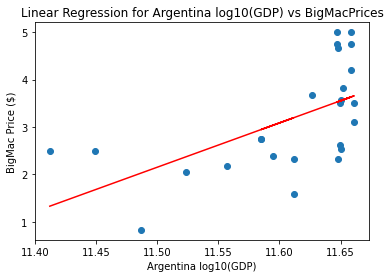

In [34]:
# Creating a scatter plot with a regression curve
plt.scatter(X, y)
plt.xlabel('Argentina log10(GDP)')
plt.ylabel('BigMac Price ($)')
plt.title('Linear Regression for Argentina log10(GDP) vs BigMacPrices')
plt.plot(X, y_pred, color='red')
plt.show()

In [35]:
# R-square for the model
print(model.score(X,y))

0.3418195242066663


In [36]:
# This model could not find a good corelation between the feature and target as indicated by low R-square value

# Applying Linear Regression to Argentina GDP_Per_Capita

In [37]:
# Using per capita GDP as X and dollar_price as y
X = df_Argentina.GDP_Per_Capita.values.reshape(-1,1)
y = df_Argentina.dollar_price.values.reshape(-1,1)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# Instantiate linear regression model
model = LinearRegression()


In [39]:
# training the model
model.fit(X,y)

LinearRegression()

In [40]:
# Predicting target value for the data set
y_pred = model.predict(X)

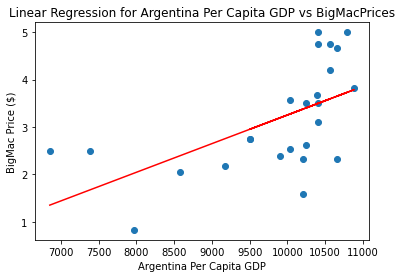

In [41]:
# Creating a scatter plot with a regression curve
plt.scatter(X, y)
plt.xlabel('Argentina Per Capita GDP')
plt.ylabel('BigMac Price ($)')
plt.title('Linear Regression for Argentina Per Capita GDP vs BigMacPrices')
plt.plot(X, y_pred, color='red')
plt.show()

In [42]:
# R-square for the model
print(model.score(X,y))

0.32965882851456674


In [43]:
# No corelation was observed when Linear Regression was applied to GDP_Per_Capita (feature) and dollar_price (target)

# Applying RandomForest Regressor to Argentina

In [283]:
df_Argentina.head(2)

,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region,GDP_log10
0,4/1/2000,ARS,Argentina,2.5,1,2.5,2000,ARG,-10.894485,6854.294081,2.582820e+11,32,Americas,Latin America and the Caribbean,11.412094
22,4/1/2001,ARS,Argentina,2.5,1,2.5,2001,ARG,8.837041,7380.467087,2.811060e+11,32,Americas,Latin America and the Caribbean,11.448870


In [284]:
# Dropping columns "local_price", "dollar_ex" and columns with strings
df_Argentina_modified = df_Argentina.drop(['date','currency_code', 'Country', 'Code', 'country_code', 'region', 'sub_region', 'local_price', 'dollar_ex'], axis =1)

In [285]:
# Defining Feature(X) and variable (y)
X = df_Argentina_modified.drop('dollar_price', axis=1)
y = df_Argentina_modified.dollar_price

In [286]:
X.head()

,Year,gdp_growth,GDP_Per_Capita,GDP,GDP_log10
0,2000,-10.894485,6854.294081,2.582820e+11,11.412094
22,2001,8.837041,7380.467087,2.811060e+11,11.448870
44,2002,9.029573,7962.412309,3.064890e+11,11.486415
70,2003,8.851660,8577.864994,3.336180e+11,11.523249
94,2004,8.047152,9174.502458,3.604650e+11,11.556863


In [287]:
df_Argentina_modified.dollar_price.describe()

count    25.000000
mean      3.155600
std       1.123366
min       0.830000
25%       2.380000
50%       2.750000
75%       3.830000
max       5.000000
Name: dollar_price, dtype: float64

In [288]:
mean = df_Argentina_modified.dollar_price.values.mean()
print(mean)

3.1555999999999993


In [289]:
# Splitting the data set into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 28)

In [290]:
# Instantiate the RadomForestRegressor
model = RandomForestRegressor(n_estimators= 100, random_state= 0)

In [291]:
# Fitting the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [292]:
# Predicting the target value
y_pred =model.predict(X_test)

In [293]:
# Root mean square error of the model
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse)

0.458


In [294]:
# Calculating %rmse
percent_rmse = (rmse/mean)*100
print(percent_rmse)

14.513880086195973


In [295]:
errors = abs((y_pred - y_test)/y_test)
print('Mean Relative Error:', round(np.mean(errors), 2))

Mean Relative Error: 0.1


# Ending Argentina Section

# Applying ML to Canada

In [185]:
# Creating a new Dataframe containing entries from Canada
df_Canada = df.loc[df['Country'] == "Canada"]

In [186]:
len(df_Canada)

25

# Applying Linear Regression Model

In [187]:
# Defining the feature (X) and target (y)
X = df_Canada.GDP_log10.values.reshape(-1,1)
y = df_Canada.dollar_price.values.reshape(-1,1)

In [188]:
# Splitting the dataset into traning and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# Instantiate linear regression model
model = LinearRegression()


In [189]:
# training the model
model.fit(X,y)

LinearRegression()

In [190]:
# Predicting the target value
y_pred = model.predict(X)

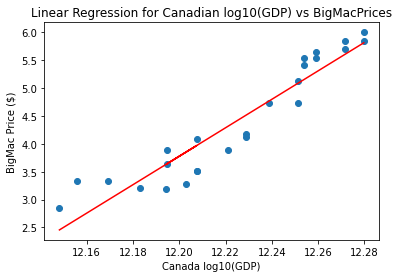

In [191]:
# Creating a scatter plot with a regression curve
plt.scatter(X, y)
plt.xlabel('Canada log10(GDP)')
plt.ylabel('BigMac Price ($)')
plt.title('Linear Regression for Canadian log10(GDP) vs BigMacPrices')
plt.plot(X, y_pred, color='red')
plt.show()

In [192]:
# R-square for the model
print(model.score(X,y))

0.8913161586943812


# Applying RandomForest Regressor to Canada

In [193]:
# Dropping columns "local_price", dollar_ex" and those containing strings
df_Canada_modified = df_Canada.drop(['date','currency_code', 'Country', 'Code', 
                                     'country_code', 'region', 'sub_region', 'local_price', 
                                     'dollar_ex', 'GDP_log10'], axis =1)

In [194]:
df_Canada_modified.head()

,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP
3,2.85,2000,3.016889,44863.21602,1.406910e+12
21,3.33,2001,1.800895,45261.33806,1.432250e+12
25,3.33,2002,3.087256,46225.36087,1.476470e+12
43,3.20,2003,3.202910,47257.47220,1.523760e+12
47,3.19,2004,2.634566,48014.93120,1.563900e+12


In [195]:
# Defining Feature(X) and variable (y)
X = df_Canada_modified.drop('dollar_price', axis=1)
y = df_Canada_modified.dollar_price

In [196]:
X.head()

,Year,gdp_growth,GDP_Per_Capita,GDP
3,2000,3.016889,44863.21602,1.406910e+12
21,2001,1.800895,45261.33806,1.432250e+12
25,2002,3.087256,46225.36087,1.476470e+12
43,2003,3.202910,47257.47220,1.523760e+12
47,2004,2.634566,48014.93120,1.563900e+12


In [197]:
df_Canada_modified.dollar_price.describe()

count    25.000000
mean      4.403600
std       1.041765
min       2.850000
25%       3.520000
50%       4.120000
75%       5.530000
max       6.000000
Name: dollar_price, dtype: float64

In [202]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 28)

In [203]:
# Instantiate the RandomForestRegression Model
model = RandomForestRegressor(n_estimators= 100, random_state= 0)

In [204]:
# Fitting the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [205]:
# Predicting the target value
y_pred =model.predict(X_test)

In [206]:
# Root mean square error of the model
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse)

0.206


In [298]:
mean = df_Canada_modified.dollar_price.values.mean()
print(mean)

# Calculating %rmse
percent_rmse = (rmse/mean)*100
print(percent_rmse)

4.4036
10.400581342537924


In [207]:
errors = abs((y_pred - y_test)/y_test)
print('Mean Relative Error:', round(np.mean(errors), 2))

Mean Relative Error: 0.03


In [208]:
# Calculate feature importance in Random Forest Model
importance = model.feature_importances_
importance

array([0.38451921, 0.01344153, 0.27070272, 0.33133654])

# End Section

# Applying ML to United States

In [209]:
# Creating a new Dataframe containing entries from United States
df_USA = df.loc[df['Country'] == "United States"]

In [210]:
len(df_USA)

25

# Applying Linear Regression Model

In [211]:
# Defining the feature (X) and target (y)
X = df_USA.GDP_log10.values.reshape(-1,1)
y = df_USA.dollar_price.values.reshape(-1,1)

In [212]:
# Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# Instantiate linear regression model
model = LinearRegression()


In [213]:
# training the model
model.fit(X,y)

LinearRegression()

In [214]:
# Predicting the target value
y_pred = model.predict(X)

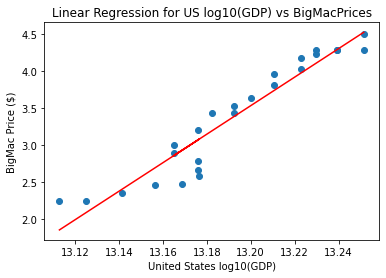

In [215]:
# Creating a scatter plot with a regression curve
plt.scatter(X, y)
plt.xlabel('United States log10(GDP)')
plt.ylabel('BigMac Price ($)')
plt.title('Linear Regression for US log10(GDP) vs BigMacPrices')
plt.plot(X, y_pred, color='red')
plt.show()

In [216]:
# R-square for the model
print(model.score(X,y))

0.9106321084063902


# Applying RandomForest Regressor to USA

In [217]:
# Dropping columns "local_price", "dollar_ex" and those with string values
df_USA_modified = df_USA.drop(['date','currency_code', 'Country', 'Code', 'country_code', 'region', 'sub_region', 'local_price', 'dollar_ex', 'GDP_log10'], axis =1)

In [218]:
df_USA_modified.head(5)

,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP
374,2.24,2000,1.741695,45087.36728,1.296830e+13
379,2.24,2001,2.861211,45980.51458,1.333930e+13
407,2.35,2002,3.798891,47287.59377,1.384610e+13
414,2.46,2003,3.513214,48499.81238,1.433250e+13
453,2.47,2004,2.854972,49405.76730,1.474170e+13


In [219]:
# Defining Feature(X) and variable (y)
X = df_USA_modified.drop('dollar_price', axis=1)
y = df_USA_modified.dollar_price

In [220]:
X.head()

,Year,gdp_growth,GDP_Per_Capita,GDP
374,2000,1.741695,45087.36728,1.296830e+13
379,2001,2.861211,45980.51458,1.333930e+13
407,2002,3.798891,47287.59377,1.384610e+13
414,2003,3.513214,48499.81238,1.433250e+13
453,2004,2.854972,49405.76730,1.474170e+13


In [221]:
df_USA_modified.dollar_price.describe()

count    25.000000
mean      3.392000
std       0.770114
min       2.240000
25%       2.670000
50%       3.430000
75%       4.180000
max       4.500000
Name: dollar_price, dtype: float64

In [222]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 28)

In [223]:
# Instantiate the RandomForestRegression model
model = RandomForestRegressor(n_estimators= 100, random_state= 0)

In [224]:
# Fitting the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [225]:
# Predicting the model
y_pred =model.predict(X_test)

In [226]:
# Root mean square error of the model
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse)

0.289


In [299]:
mean = df_USA_modified.dollar_price.values.mean()
print(mean)

# Calculating %rmse
percent_rmse = (rmse/mean)*100
print(percent_rmse)

3.3920000000000003
13.502358490566039


In [227]:
errors = abs((y_pred - y_test)/y_test)
print('Mean Relative Error:', round(np.mean(errors), 2))

Mean Relative Error: 0.07


In [228]:
# Calculate feature importance in Random Forest Model
importance = model.feature_importances_
importance

array([0.3728588 , 0.0193505 , 0.13946903, 0.46832167])

# End Section

# Looking at geographical regions

# Americas

In [229]:
df_Americas = df.loc[df['region'] == "Americas"]

In [230]:
df_Americas.head()

,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region,GDP_log10
0,4/1/2000,ARS,Argentina,2.50,1,2.50,2000,ARG,-10.894485,6854.294081,2.582820e+11,32,Americas,Latin America and the Caribbean,11.412094
2,4/1/2000,BRL,Brazil,2.95,1,2.95,2000,BRA,3.053462,8954.837245,1.607730e+12,76,Americas,Latin America and the Caribbean,12.206213
3,4/1/2000,CAD,Canada,2.85,1,2.85,2000,CAN,3.016889,44863.216020,1.406910e+12,124,Americas,Northern America,12.148266
4,4/1/2000,CLP,Chile,1260.00,514,2.45,2000,CHL,3.106971,9814.656135,1.539370e+11,152,Americas,Latin America and the Caribbean,11.187343
13,4/1/2000,MXN,Mexico,20.90,9,2.32,2000,MEX,-0.039844,8960.554086,9.111520e+11,484,Americas,Latin America and the Caribbean,11.959591


In [231]:
# Defining the feature (X) and target (y)
X = df_Americas.GDP_log10.values.reshape(-1,1)
y = df_Americas.dollar_price.values.reshape(-1,1)

In [232]:
# Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# Instantiate linear regression model
model = LinearRegression()

# training the model
model.fit(X,y)

# Predicting the target value
y_pred = model.predict(X)

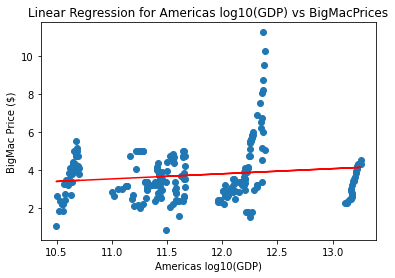

In [233]:
# Creating a scatter plot with a regression curve
plt.scatter(X, y)
plt.xlabel('Americas log10(GDP)')
plt.ylabel('BigMac Price ($)')
plt.title('Linear Regression for Americas log10(GDP) vs BigMacPrices')
plt.plot(X, y_pred, color='red')
plt.show()

In [234]:
# R-square for the model
print(model.score(X,y))

0.019583743443533863


In [101]:
# Applying RandomForestRegression to Americas

In [235]:
# Dropping columns "local_price", "dollar_ex" and those with string values
df_Americas_modified = df_Americas.drop(['date','currency_code', 'Country', 'Code', 'country_code', 'region', 'sub_region',
                               'local_price', 'dollar_ex', 'GDP_log10'], axis =1)

df_Americas_modified.head(5)

,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP
0,2.50,2000,-10.894485,6854.294081,2.582820e+11
2,2.95,2000,3.053462,8954.837245,1.607730e+12
3,2.85,2000,3.016889,44863.216020,1.406910e+12
4,2.45,2000,3.106971,9814.656135,1.539370e+11
13,2.32,2000,-0.039844,8960.554086,9.111520e+11


In [236]:
# Defining Feature(X) and variable (y)
X = df_Americas_modified.drop('dollar_price', axis=1)
y = df_Americas_modified.dollar_price

In [237]:
X.head()

,Year,gdp_growth,GDP_Per_Capita,GDP
0,2000,-10.894485,6854.294081,2.582820e+11
2,2000,3.053462,8954.837245,1.607730e+12
3,2000,3.016889,44863.216020,1.406910e+12
4,2000,3.106971,9814.656135,1.539370e+11
13,2000,-0.039844,8960.554086,9.111520e+11


In [238]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 28)

# Instantiate the RandomForestRegression model
model = RandomForestRegressor(n_estimators= 100, random_state= 0)

# Fitting the model
model.fit(X_train, y_train)

# Predicting the model
y_pred =model.predict(X_test)

# Root mean square error of the model
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse)

0.406


In [300]:
mean = df_Americas_modified.dollar_price.values.mean()
print(mean)

# Calculating %rmse
percent_rmse = (rmse/mean)*100
print(percent_rmse)

3.7175324675324677
12.32


In [301]:
errors = abs((y_pred - y_test)/y_test)
print('Mean Relative Error:', round(np.mean(errors), 2))

Mean Relative Error: 0.1


#  Asia

In [240]:
df_Asia = df.loc[df['region'] == "Asia"]
df_Asia.head()

,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region,GDP_log10
5,4/1/2000,CNY,China,9.90,8,1.24,2000,CHN,9.130646,2061.162284,2.639110e+12,156,Asia,Eastern Asia,12.421457
9,4/1/2000,IDR,Indonesia,14500.00,7945,1.83,2000,IDN,4.499475,2259.307704,4.910780e+11,360,Asia,South-eastern Asia,11.691150
10,4/1/2000,ILS,Israel,14.50,4,3.62,2000,ISR,0.012565,26521.377670,1.742450e+11,376,Asia,Western Asia,11.241160
11,4/1/2000,JPY,Japan,294.00,106,2.77,2000,JPN,0.117993,42190.804870,5.377010e+12,392,Asia,Eastern Asia,12.730541
12,4/1/2000,MYR,Malaysia,4.52,3,1.51,2000,MYS,5.390988,7112.055595,1.721710e+11,458,Asia,South-eastern Asia,11.235960


In [241]:
# Defining the feature (X) and target (y)
X = df_Asia.GDP_log10.values.reshape(-1,1)
y = df_Asia.dollar_price.values.reshape(-1,1)

In [242]:
# Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# Instantiate linear regression model
model = LinearRegression()

# training the model
model.fit(X,y)

# Predicting the target value
y_pred = model.predict(X)

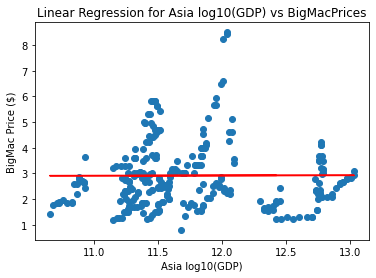

In [243]:
# Creating a scatter plot with a regression curve
plt.scatter(X, y)
plt.xlabel('Asia log10(GDP)')
plt.ylabel('BigMac Price ($)')
plt.title('Linear Regression for Asia log10(GDP) vs BigMacPrices')
plt.plot(X, y_pred, color='red')
plt.show()

# Applying RandomForestRegression to Asia

In [244]:
# Dropping columns "local_price", "dollar_ex" and those with string values
df_Asia_modified = df_Asia.drop(['date','currency_code', 'Country', 'Code', 'country_code', 'region', 'sub_region',
                               'local_price', 'dollar_ex', 'GDP_log10'], axis =1)

df_Asia_modified.head(5)

,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP
5,1.24,2000,9.130646,2061.162284,2.639110e+12
9,1.83,2000,4.499475,2259.307704,4.910780e+11
10,3.62,2000,0.012565,26521.377670,1.742450e+11
11,2.77,2000,0.117993,42190.804870,5.377010e+12
12,1.51,2000,5.390988,7112.055595,1.721710e+11


In [245]:
# Defining Feature(X) and variable (y)
X = df_Asia_modified.drop('dollar_price', axis=1)
y = df_Asia_modified.dollar_price

In [246]:
X.head()

,Year,gdp_growth,GDP_Per_Capita,GDP
5,2000,9.130646,2061.162284,2.639110e+12
9,2000,4.499475,2259.307704,4.910780e+11
10,2000,0.012565,26521.377670,1.742450e+11
11,2000,0.117993,42190.804870,5.377010e+12
12,2000,5.390988,7112.055595,1.721710e+11


In [247]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 28)

# Instantiate the RandomForestRegression model
model = RandomForestRegressor(n_estimators= 100, random_state= 0)

# Fitting the model
model.fit(X_train, y_train)

# Predicting the model
y_pred =model.predict(X_test)

# Root mean square error of the model
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse)

0.353


In [302]:
mean = df_Asia_modified.dollar_price.values.mean()
print(mean)

# Calculating %rmse
percent_rmse = (rmse/mean)*100
print(percent_rmse)

2.918892733564014
15.69088150220494


In [303]:
errors = abs((y_pred - y_test)/y_test)
print('Mean Relative Error:', round(np.mean(errors), 2))

Mean Relative Error: 0.1


# Europe

In [249]:
df_Europe = df.loc[df['region'] == "Europe"]
df_Europe.head()

,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region,GDP_log10
6,4/1/2000,CZK,Czech Republic,54.37,39,1.39,2000,CZE,1.652494,15577.39220,1.588410e+11,203,Europe,Eastern Europe,11.200963
7,4/1/2000,DKK,Denmark,24.75,8,3.09,2000,DNK,0.466346,56190.81125,3.020780e+11,208,Europe,Northern Europe,11.480119
8,4/1/2000,HUF,Hungary,339.00,279,1.22,2000,HUN,4.528206,11450.28384,1.163190e+11,348,Europe,Eastern Europe,11.065651
15,4/1/2000,PLN,Poland,5.50,4,1.38,2000,POL,2.041716,8815.45902,3.370180e+11,616,Europe,Eastern Europe,11.527653
18,4/1/2000,SEK,Sweden,24.00,8,3.00,2000,SWE,2.075301,46123.93699,4.116540e+11,752,Europe,Northern Europe,11.614532


In [250]:
# Defining the feature (X) and target (y)
X = df_Europe.GDP_log10.values.reshape(-1,1)
y = df_Europe.dollar_price.values.reshape(-1,1)

In [251]:
# Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# Instantiate linear regression model
model = LinearRegression()

# training the model
model.fit(X,y)

# Predicting the target value
y_pred = model.predict(X)

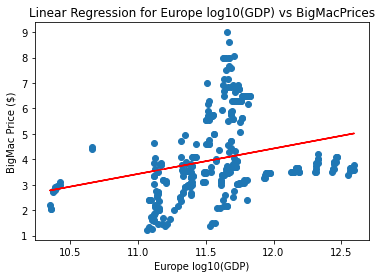

In [252]:
# Creating a scatter plot with a regression curve
plt.scatter(X, y)
plt.xlabel('Europe log10(GDP)')
plt.ylabel('BigMac Price ($)')
plt.title('Linear Regression for Europe log10(GDP) vs BigMacPrices')
plt.plot(X, y_pred, color='red')
plt.show()

# Applying RandomForestRegression to Europe

In [253]:
# Dropping columns "local_price", "dollar_ex" and those with string values
df_Europe_modified = df_Europe.drop(['date','currency_code', 'Country', 'Code', 'country_code', 'region', 'sub_region',
                               'local_price', 'dollar_ex', 'GDP_log10'], axis =1)

df_Europe_modified.head(5)

,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP
6,1.39,2000,1.652494,15577.39220,1.588410e+11
7,3.09,2000,0.466346,56190.81125,3.020780e+11
8,1.22,2000,4.528206,11450.28384,1.163190e+11
15,1.38,2000,2.041716,8815.45902,3.370180e+11
18,3.00,2000,2.075301,46123.93699,4.116540e+11


In [254]:
# Defining Feature(X) and variable (y)
X = df_Europe_modified.drop('dollar_price', axis=1)
y = df_Europe_modified.dollar_price

In [255]:
X.head()

,Year,gdp_growth,GDP_Per_Capita,GDP
6,2000,1.652494,15577.39220,1.588410e+11
7,2000,0.466346,56190.81125,3.020780e+11
8,2000,4.528206,11450.28384,1.163190e+11
15,2000,2.041716,8815.45902,3.370180e+11
18,2000,2.075301,46123.93699,4.116540e+11


In [256]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 28)

# Instantiate the RandomForestRegression model
model = RandomForestRegressor(n_estimators= 100, random_state= 0)

# Fitting the model
model.fit(X_train, y_train)

# Predicting the model
y_pred =model.predict(X_test)

# Root mean square error of the model
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse)

0.528


In [304]:
mean = df_Europe_modified.dollar_price.values.mean()
print(mean)

# Calculating %rmse
percent_rmse = (rmse/mean)*100
print(percent_rmse)

4.013107692307693
11.412601781853311


In [257]:
errors = abs((y_pred - y_test)/y_test)
print('Mean Relative Error:', round(np.mean(errors), 2))

Mean Relative Error: 0.09


# Top Five GDPs

In [258]:
topFive = ['USA', 'CHN', 'JPN', 'DEU', 'FRA']
df_topFive = df.loc[df['Code'].isin(topFive)]
df_topFive

,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region,GDP_log10
5,4/1/2000,CNY,China,9.90,8,1.24,2000,CHN,9.130646,2061.162284,2.639110e+12,156,Asia,Eastern Asia,12.421457
11,4/1/2000,JPY,Japan,294.00,106,2.77,2000,JPN,0.117993,42190.804870,5.377010e+12,392,Asia,Eastern Asia,12.730541
27,4/1/2001,CNY,China,9.90,8,1.24,2001,CHN,10.035603,2253.929689,2.903960e+12,156,Asia,Eastern Asia,12.462991
32,4/1/2001,JPY,Japan,294.00,124,2.37,2001,JPN,1.528220,42744.011280,5.459180e+12,392,Asia,Eastern Asia,12.737127
49,4/1/2002,CNY,China,10.50,8,1.31,2002,CHN,10.111223,2467.132843,3.197590e+12,156,Asia,Eastern Asia,12.504823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,7/1/2016,CNY,China,18.60,6,3.10,2016,CHN,6.600000,7754.962119,1.080060e+13,156,Asia,Eastern Asia,13.033448
887,7/1/2016,EUR,France,4.10,1,4.10,2016,FRA,1.724881,43663.584920,2.924900e+12,250,Europe,Western Europe,12.466111
888,7/1/2016,EUR,Germany,3.79,1,3.79,2016,DEU,1.425303,47501.812650,3.939230e+12,276,Europe,Western Europe,12.595411
896,7/1/2016,JPY,Japan,370.00,106,3.49,2016,JPN,0.787965,48919.560890,6.189750e+12,392,Asia,Eastern Asia,12.791673


In [259]:
# Defining the feature (X) and target (y)
X = df_topFive.GDP_log10.values.reshape(-1,1)
y = df_topFive.dollar_price.values.reshape(-1,1)

In [260]:
# Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# Instantiate linear regression model
model = LinearRegression()

# training the model
model.fit(X,y)

# Predicting the target value
y_pred = model.predict(X)

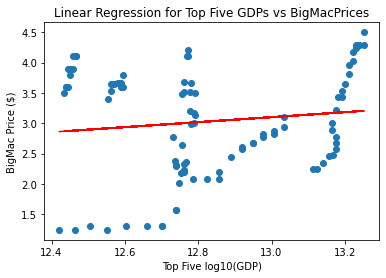

In [261]:
# Creating a scatter plot with a regression curve
plt.scatter(X, y)
plt.xlabel('Top Five log10(GDP)')
plt.ylabel('BigMac Price ($)')
plt.title('Linear Regression for Top Five GDPs vs BigMacPrices')
plt.plot(X, y_pred, color='red')
plt.show()

In [262]:
# Dropping columns "local_price", "dollar_ex" and those with string values
df_topFive_modified = df_topFive.drop(['date','currency_code', 'Country', 'Code', 'country_code', 'region', 'sub_region',
                               'local_price', 'dollar_ex', 'GDP_log10'], axis =1)

df_topFive_modified.head(5)

,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP
5,1.24,2000,9.130646,2061.162284,2.639110e+12
11,2.77,2000,0.117993,42190.804870,5.377010e+12
27,1.24,2001,10.035603,2253.929689,2.903960e+12
32,2.37,2001,1.528220,42744.011280,5.459180e+12
49,1.31,2002,10.111223,2467.132843,3.197590e+12


In [263]:
# Defining Feature(X) and variable (y)
X = df_topFive_modified.drop('dollar_price', axis=1)
y = df_topFive_modified.dollar_price

In [264]:
X.head()

,Year,gdp_growth,GDP_Per_Capita,GDP
5,2000,9.130646,2061.162284,2.639110e+12
11,2000,0.117993,42190.804870,5.377010e+12
27,2001,10.035603,2253.929689,2.903960e+12
32,2001,1.528220,42744.011280,5.459180e+12
49,2002,10.111223,2467.132843,3.197590e+12


In [265]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 28)

# Instantiate the RandomForestRegression model
model = RandomForestRegressor(n_estimators= 100, random_state= 0)

# Fitting the model
model.fit(X_train, y_train)

# Predicting the model
y_pred =model.predict(X_test)

# Root mean square error of the model
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse)

0.185


In [305]:
mean = df_topFive_modified.dollar_price.values.mean()
print(mean)

# Calculating %rmse
percent_rmse = (rmse/mean)*100
print(percent_rmse)

3.0287628865979377
15.121685557711292


In [266]:
errors = abs((y_pred - y_test)/y_test)
print('Mean Relative Error:', round(np.mean(errors), 2))

Mean Relative Error: 0.04


In [134]:
# Bottom Five GDP's

In [267]:
bottomFive = ['EST', 'URY', 'CRI', 'LKA', 'HUN']
df_bottomFive = df.loc[df['Code'].isin(bottomFive)]
df_bottomFive.head()

,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region,GDP_log10
8,4/1/2000,HUF,Hungary,339.0,279,1.22,2000,HUN,4.528206,11450.283840,1.163190e+11,348,Europe,Eastern Europe,11.065651
30,4/1/2001,HUF,Hungary,399.0,303,1.32,2001,HUN,3.848620,11925.070210,1.207960e+11,348,Europe,Eastern Europe,11.082053
52,4/1/2002,HUF,Hungary,459.0,272,1.69,2002,HUN,5.004918,12549.669360,1.268410e+11,348,Europe,Eastern Europe,11.103260
78,4/1/2003,HUF,Hungary,490.0,224,2.19,2003,HUN,4.388215,13126.455660,1.324070e+11,348,Europe,Eastern Europe,11.121911
101,5/1/2004,CRC,Costa Rica,1130.0,433,2.61,2004,CRI,7.237733,7289.904345,3.167764e+10,188,Americas,Latin America and the Caribbean,10.500753


In [268]:
# Defining the feature (X) and target (y)
X = df_bottomFive.GDP_log10.values.reshape(-1,1)
y = df_bottomFive.dollar_price.values.reshape(-1,1)

In [269]:
# Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# Instantiate linear regression model
model = LinearRegression()

# training the model
model.fit(X,y)

# Predicting the target value
y_pred = model.predict(X)

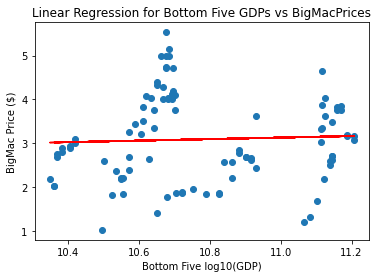

In [270]:
# Creating a scatter plot with a regression curve
plt.scatter(X, y)
plt.xlabel('Bottom Five log10(GDP)')
plt.ylabel('BigMac Price ($)')
plt.title('Linear Regression for Bottom Five GDPs vs BigMacPrices')
plt.plot(X, y_pred, color='red')
plt.show()

In [271]:
# Dropping columns "local_price", "dollar_ex" and those with string values
df_bottomFive_modified = df_bottomFive.drop(['date','currency_code', 'Country', 'Code', 'country_code', 'region', 'sub_region',
                               'local_price', 'dollar_ex', 'GDP_log10'], axis =1)

df_bottomFive_modified.head(5)

,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP
8,1.22,2000,4.528206,11450.283840,1.163190e+11
30,1.32,2001,3.848620,11925.070210,1.207960e+11
52,1.69,2002,5.004918,12549.669360,1.268410e+11
78,2.19,2003,4.388215,13126.455660,1.324070e+11
101,2.61,2004,7.237733,7289.904345,3.167764e+10


In [272]:
# Defining Feature(X) and variable (y)
X = df_bottomFive_modified.drop('dollar_price', axis=1)
y = df_bottomFive_modified.dollar_price

In [273]:
X.head()

,Year,gdp_growth,GDP_Per_Capita,GDP
8,2000,4.528206,11450.283840,1.163190e+11
30,2001,3.848620,11925.070210,1.207960e+11
52,2002,5.004918,12549.669360,1.268410e+11
78,2003,4.388215,13126.455660,1.324070e+11
101,2004,7.237733,7289.904345,3.167764e+10


In [274]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 28)

# Instantiate the RandomForestRegression model
model = RandomForestRegressor(n_estimators= 100, random_state= 0)

# Fitting the model
model.fit(X_train, y_train)

# Predicting the model
y_pred =model.predict(X_test)

# Root mean square error of the model
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse)

0.288


In [306]:
mean = df_bottomFive_modified.dollar_price.values.mean()
print(mean)

# Calculating %rmse
percent_rmse = (rmse/mean)*100
print(percent_rmse)

3.0930526315789475
14.807378164987748


In [275]:
errors = abs((y_pred - y_test)/y_test)
print('Mean Relative Error:', round(np.mean(errors), 2))

Mean Relative Error: 0.1


# Scrapsheets

In [144]:
# # Define independent variable, I am using the log(GDP)
# X =df.GDP_log10.values.reshape(-1,1)

In [145]:
# # Define dependent variable, I am assuming that the column header will be "price"
# y= df.dollar_price.values.reshape(-1,1)

In [146]:
# scaler = StandardScaler()

In [147]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [148]:
# # Instantiate linear regression model
# model = LinearRegression()


In [149]:
# # training the model
# model.fit(X,y)

In [150]:
# y_pred = model.predict(X)

In [151]:
# plt.scatter(X, y)
# plt.plot(X, y_pred, color='red')
# plt.show()

In [152]:
# print(model.coef_)
# print(model.intercept_)

In [153]:
# print(model.score(X,y))

# Using 2nd Polynomial

In [154]:
# Import dependencies
from sklearn.preprocessing import PolynomialFeatures

# Save an instance of Polynomial Feature
poly = PolynomialFeatures(degree=2, include_bias=True)

In [155]:
# poly_features = poly.fit_transform(X.reshape(-1,1))

In [156]:
# y

In [157]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [158]:
# poly_reg_model = LinearRegression()

In [159]:
# poly_reg_model.fit(X_train, y_train)

In [160]:
# y_predicted = poly_reg_model.predict(X_test)
# y_predicted

In [161]:
# from sklearn.metrics import mean_squared_error

In [162]:
# poly_reg_rmse = np.sqrt(mean_squared_error(y_test,
#                                           y_predicted))
# poly_reg_rmse

In [163]:
# plt.figure(figsize= (10,6))
# plt.title("Polynomial Reg", size=16)
# plt.scatter(X, y)
# plt.plot(X, y_predicted, c='red')
# plt.show()

# Lets try RandomForestRegressor

In [164]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [165]:
# X =df.GDP_log10.values.reshape(-1,1)
# y= df.dollar_price

In [166]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=78)

In [167]:
# # Creating a StandardScalar instance
# scaler = StandardScaler()

# # Fitting the Standard Scalar with the training data
# X_scalar = scaler.fit(X_train)

# # Scaling the data
# X_train_scaled = X_scalar.transform(X_train)
# X_test_scaled = X_scalar.transform(X_test)

In [168]:
# # Create a random forest classifier
# rf_model = RandomForestRegressor(n_estimators=500, random_state=0)

In [169]:
# # Fitting the model
# rf_model = rf_model.fit(X_train_scaled, y_train)

In [170]:
# # Making predictions using the testing data
# predictions = rf_model.predict(X_test_scaled)

In [171]:
# # Calculating the accuracy score
# mse = mean_squared_error(y_test, predictions)

# rmse = mse**0.5

# print(mse)
# print(rmse)

0.1738726525555269
0.4169803982869301


In [172]:
# # Calculate feature importance in Random Forest Model
# importance = rf_model.feature_importances_
# importance

array([0.33178495, 0.25171763, 0.25515563, 0.1613418 ])